In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
# CSV文件中列的顺序
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [37]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [38]:
# download raw data
train_path = tf.keras.utils.get_file("iris_training.csv", 
                                     "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv",
                                     cache_dir='./')
test_path = tf.keras.utils.get_file("iris_test.csv", 
                                    "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv", 
                                    cache_dir='./')

In [39]:
batch_size = 32


train_dataset = tf.data.experimental.make_csv_dataset(train_path,
                                                      batch_size,
                                                      column_names=column_names,
                                                      label_name=label_name,
                                                      num_epochs=1,
                                                      shuffle=True)

test_dataset = tf.data.experimental.make_csv_dataset(train_path,
                                                      batch_size,
                                                      column_names=column_names,
                                                      label_name=label_name,
                                                      num_epochs=1,
                                                      shuffle=False)

In [40]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.8, 6. , 4.4, 5.6, 5.5, 5.8, 7.4, 5.3, 5.6, 5.4, 5.7, 6.4, 6.8,
       6.3, 6.8, 6.6, 6.7, 7.7, 5. , 7.6, 4.6, 6.6, 5.8, 6.5, 4.9, 6.3,
       4.7, 6.8, 5.2, 6.2, 5.6, 6.4], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3. , 3. , 3. , 2.5, 2.6, 2.8, 2.8, 3.7, 2.9, 3. , 2.9, 3.1, 2.8,
       2.3, 3.2, 3. , 3. , 2.6, 3.3, 3. , 3.6, 2.9, 4. , 3.2, 2.5, 3.4,
       3.2, 3. , 3.5, 2.2, 2.7, 2.8], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.4, 4.8, 1.3, 3.9, 4.4, 5.1, 6.1, 1.5, 3.6, 4.5, 4.2, 5.5, 4.8,
       4.4, 5.9, 4.4, 5. , 6.9, 1.4, 6.6, 1. , 4.6, 1.2, 5.1, 4.5, 5.6,
       1.3, 5.5, 1.5, 4.5, 4.2, 5.6], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.1, 1.8, 0.2, 1.1, 1.2, 2.4, 1.9, 0.2, 1.3, 1.5, 1.3, 1.8, 1.4,
       1.3, 2.3, 1.4, 1.7, 2.3, 0.2, 2.1, 0.2, 1.3, 0.2, 2. ,

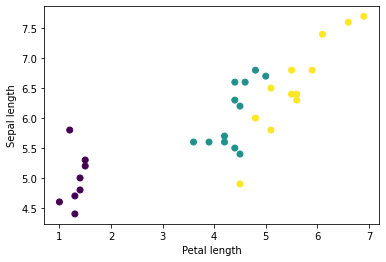

In [41]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [42]:
# (batch_size, num_features)
def pack_features_vector(features, labels):
    """
    将一组特征列表（list）打包成一个特征向量
    [[32], [32], [32], [32]] -> [[32, 4]]
    tf.stack(list, axis=1): 将 N 个秩为 R 的向量 (A)，变成一个 R+1 的向量 (A, N）
    """
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [43]:
train_dataset = train_dataset.map(pack_features_vector)
train_dataset

<MapDataset shapes: ((None, 4), (None,)), types: (tf.float32, tf.int32)>

In [44]:
features, labels = next(iter(train_dataset))

features

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[5.5, 2.4, 3.8, 1.1],
       [5.8, 2.6, 4. , 1.2],
       [7.9, 3.8, 6.4, 2. ],
       [4.6, 3.1, 1.5, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5. , 2.3, 3.3, 1. ],
       [6. , 2.9, 4.5, 1.5],
       [6.7, 3.3, 5.7, 2.1],
       [7.7, 3.8, 6.7, 2.2],
       [6.7, 3. , 5.2, 2.3],
       [5.1, 3.8, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [4.6, 3.2, 1.4, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [7.2, 3. , 5.8, 1.6],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.5, 1.6, 0.6],
       [6.7, 3.1, 5.6, 2.4],
       [7.2, 3.2, 6. , 1.8],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.4, 3. , 4.5, 1.5],
       [6.5, 3. , 5.8, 2.2],
       [6.1, 2.8, 4. , 1.3],
       [5.2, 3.5, 1.5, 0.2]], dtype=float32)>

In [45]:
# 前项计算
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # 需要给出输入的形式
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [46]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-1.966444  , -1.2609706 ,  0.64045286],
       [-2.0666964 , -1.3268392 ,  0.6746191 ],
       [-2.9468424 , -2.0385637 ,  0.7882123 ],
       [-0.9877722 , -0.45749253,  0.83216244],
       [-1.1708478 , -0.50554466,  0.8047528 ]], dtype=float32)>

In [47]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.06030737, 0.12211066, 0.81758195],
       [0.05375475, 0.1126504 , 0.8335948 ],
       [0.02204082, 0.05466233, 0.92329687],
       [0.1127286 , 0.19157183, 0.6956995 ],
       [0.09846368, 0.19151972, 0.71001655]], dtype=float32)>

In [48]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [1 1 2 0 0 1 1 2 2 2 0 0 0 0 0 0 0 2 0 0 2 2 0 0 0 1 2 1 1 2 1 0]


# 训练

In [49]:
# 定义 loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
l = loss_fn(y_true=labels, y_pred=model(features))

print("Loss test: {}".format(l))

Loss test: 1.6481213569641113


In [50]:
# 求梯度（反向链式求导）
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(y_true=labels, y_pred=model(features))
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [51]:
# 设置优化器
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [52]:
# 训练一个 batch 的过程

# 计算 loss, 求梯度
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))
# 更新参数
optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_fn(y_true=labels, y_pred=model(features).numpy())))

Step: 0, Initial Loss: 1.6481213569641113
Step: 1,         Loss: 1.4311933517456055


## 完整的训练过程

In [53]:
## Note: 使用相同的模型变量重新运行此单元

# 保留结果用于绘制
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 32
    for x, y in train_dataset:
        # 优化模型
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # 追踪进度
        epoch_loss_avg(loss_value)  # 添加当前的 batch loss
        # 比较预测标签与真实标签
        epoch_accuracy(y, model(x))

    # 循环结束
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

Epoch 000: Loss: 1.222, Accuracy: 35.000%
Epoch 050: Loss: 0.010, Accuracy: 99.167%
Epoch 100: Loss: 0.001, Accuracy: 97.500%
Epoch 150: Loss: 0.000, Accuracy: 97.500%
Epoch 200: Loss: 0.000, Accuracy: 97.500%


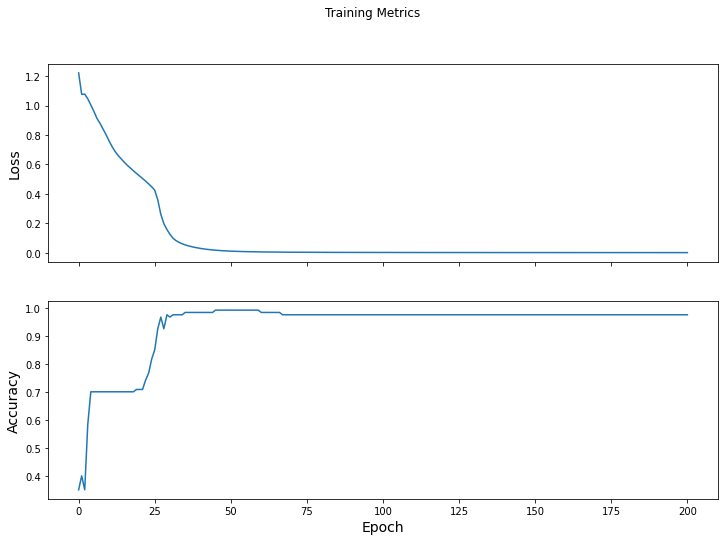

In [54]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

## 测试集评估

In [56]:
test_accuracy = tf.keras.metrics.Accuracy()
test_dataset = test_dataset.map(pack_features_vector)

for (x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 97.500%


In [57]:
tf.stack([y, prediction],axis=1)

<tf.Tensor: shape=(24, 2), dtype=int32, numpy=
array([[0, 0],
       [2, 2],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1]], dtype=int32)>

## 预测

In [61]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1],
    [3.9, 3.1, 4.4, 3.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (100.0%)
Example 1 prediction: Iris versicolor (100.0%)
Example 2 prediction: Iris virginica (99.9%)
Example 3 prediction: Iris virginica (100.0%)
